In [75]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\delivery_time.csv")

In [36]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [44]:
df=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [45]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

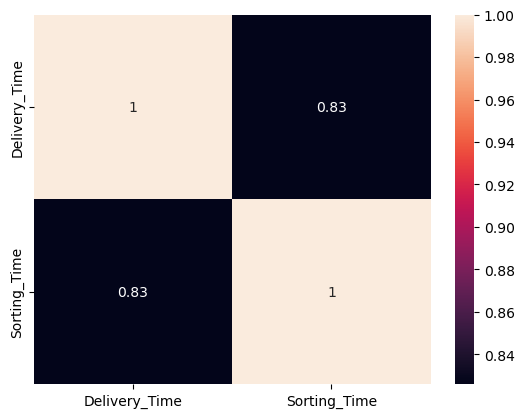

In [46]:
sb.heatmap(df.corr(),annot=True)

#### Checking for an outlier

<AxesSubplot:>

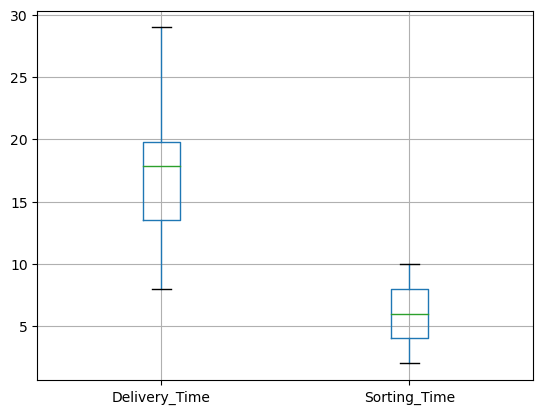

In [47]:
df.boxplot()

In [49]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [50]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


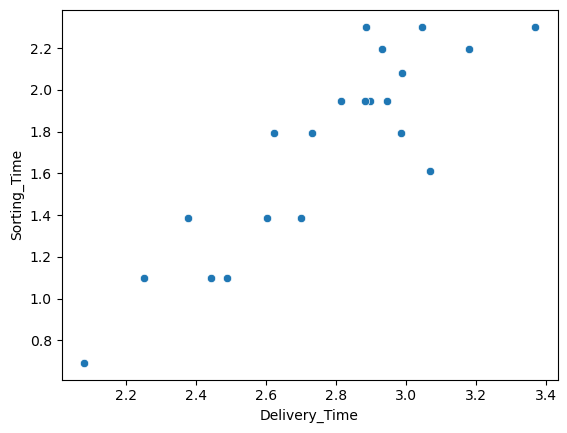

In [81]:
sb.scatterplot(np.log(df['Delivery_Time']),np.log(df['Sorting_Time']))
plt.show()

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

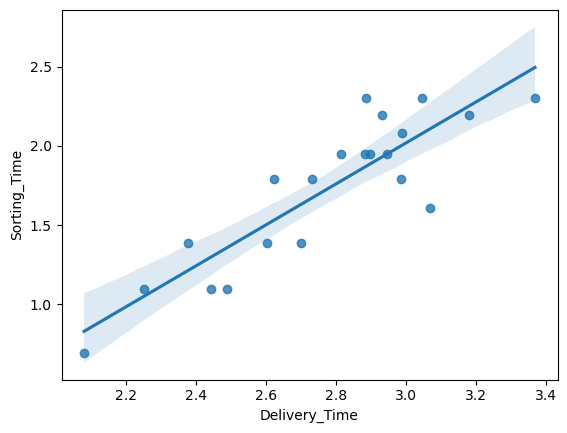

In [105]:
sb.regplot(np.log(df['Delivery_Time']),np.log(df['Sorting_Time']))

In [51]:
# importing stats model for model building

## Model buiding

In [156]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [157]:
import statsmodels.formula.api as smf

In [158]:
model=smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [159]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [160]:
model.rsquared

0.6822714748417231

### Taking log transformation for better accuracy

In [161]:
model1=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=df).fit()

In [162]:
model1.rsquared

0.6954434611324223

### Taking log on target column

In [164]:
model2=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=df).fit()

In [165]:
model2.rsquared

0.7109478980584187

### Taking log on both side

In [166]:
model3=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=df).fit()

In [167]:
model3.rsquared

0.77216134926874

In [168]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [172]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Prediction on new data

In [180]:

newadata = pd.Series([9,10,12,50])

newdata = pd.DataFrame(newadata, columns=['Sorting_Time'])

In [181]:
newdata

,Sorting_Time
0,9
1,10
2,12
3,50


In [185]:
np.exp(model3.predict(newdata))

0    21.218593
1    22.597360
2    25.198244
3    59.116388
dtype: float64